Jurnal Modul 6:
1. Lakukanlah deteksi tepi dengan menggunakan metode Sobel, Prewitt dan Roberts

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

Penjelasan Script di atas antara lain:

Pada baris pertama, import numpy as np digunakan untuk mengimpor pustaka NumPy. NumPy adalah pustaka yang digunakan untuk komputasi numerik dengan Python.

Pada baris kedua, import matplotlib.pyplot as plt digunakan untuk mengimpor pustaka Matplotlib. Matplotlib adalah pustaka yang digunakan untuk membuat visualisasi grafik dan plot.

Pada baris ketiga, import cv2 as cv digunakan untuk mengimpor pustaka OpenCV (Open Source Computer Vision Library). OpenCV adalah pustaka yang digunakan untuk memanipulasi gambar dan video. 

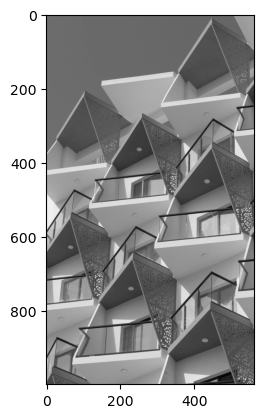

In [20]:
pict = plt.imread("btn.png")
g_pict = cv.cvtColor(pict,cv.COLOR_RGB2GRAY)

plt.imshow(g_pict, 'gray')
plt.show()

Script di atas digunakan untuk membaca dan menampilkan gambar menggunakan pustaka Matplotlib dan OpenCV. Berikut adalah penjelasan langkah demi langkah:

pict = plt.imread("Nama Gambar"): Baris ini membaca gambar dengan nama "Nama Gambar" menggunakan fungsi imread dari Matplotlib. Gambar tersebut kemudian disimpan dalam variabel pict.

g_pict = cv.cvtColor(pict,cv.COLOR_RGB2GRAY): Baris ini mengubah mode warna gambar dari RGB ke skala abu-abu (grayscale) menggunakan fungsi cvtColor dari OpenCV. Gambar skala abu-abu disimpan dalam variabel g_pict.

plt.imshow(g_pict, 'gray'): Baris ini menggunakan fungsi imshow dari Matplotlib untuk menampilkan gambar skala abu-abu. Parameter pertama adalah gambar yang ingin ditampilkan (g_pict), dan parameter kedua adalah mode tampilan gambar ('gray' untuk skala abu-abu).

plt.show(): Baris ini memanggil fungsi show dari Matplotlib untuk menampilkan gambar yang sudah ditampilkan menggunakan imshow.

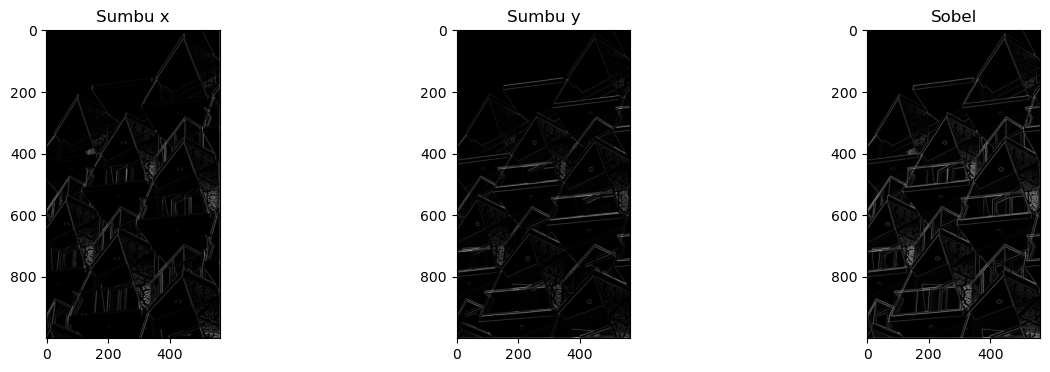

In [21]:
def sobel(image):
    panjang, lebar = image.shape

    kernel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    kernel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

    result = np.zeros((panjang, lebar))
    result_x = np.zeros((panjang, lebar))
    result_y = np.zeros((panjang, lebar))

    padded_image = np.pad(image, ((1, 1), (1, 1)), mode='constant')

    for i in range(1, panjang + 1):
        for j in range(1, lebar + 1):
            sumbu_x = np.sum(np.multiply(padded_image[i - 1 : i + 2, j - 1 : j + 2], kernel_x))
            sumbu_y = np.sum(np.multiply(padded_image[i - 1 : i + 2, j - 1 : j + 2], kernel_y))

            fix_pixel = np.sqrt(sumbu_x ** 2 + sumbu_y ** 2)
            result[i - 1, j - 1] = fix_pixel
            result_x[i - 1, j - 1] = abs(sumbu_x)
            result_y[i - 1, j - 1] = abs(sumbu_y)

    return result, result_x, result_y

hasil_sob, x_sob, y_sob = sobel(g_pict)

plt.figure(facecolor = 'white', figsize = [15, 4])
plt.subplot(131)
plt.title('Sumbu x')
plt.imshow(x_sob, 'gray')
plt.subplot(132)
plt.title('Sumbu y')
plt.imshow(y_sob, 'gray')
plt.subplot(133)
plt.title('Sobel')
plt.imshow(hasil_sob, 'gray')

Script di atas mengimplementasikan fungsi `sobel(image)` yang melakukan deteksi tepi menggunakan operator Sobel. Berikut adalah penjelasan langkah demi langkah:

1. Pertama, fungsi `sobel(image)` mengambil gambar sebagai input dengan parameter `image`.

2. Variabel `panjang` dan `lebar` diinisialisasi dengan dimensi gambar menggunakan `image.shape`.

3. Dua kernel Sobel ditentukan: `kernel_x` dan `kernel_y`. Kernel Sobel digunakan untuk menghitung gradien gambar dalam arah sumbu x dan sumbu y.

4. Variabel `result` dan `result_x` dan `result_y` diinisialisasi dengan matriks nol sesuai dengan dimensi gambar.

5. Gambar `image` dipadding dengan metode 'constant' menggunakan `np.pad` untuk menghindari masalah indeks saat menghitung gradien di tepi gambar.

6. Dilakukan iterasi pada setiap piksel dalam gambar yang telah dipadding, mulai dari indeks (1, 1) hingga (panjang+1, lebar+1).

7. Untuk setiap piksel, dilakukan perkalian matriks antara bagian gambar sekitarnya dengan kernel Sobel pada sumbu x dan sumbu y. Kemudian, hasil perkalian dijumlahkan menggunakan `np.sum` untuk mendapatkan gradien di sumbu x (`sumbu_x`) dan sumbu y (`sumbu_y`).

8. Gradien di setiap piksel dihitung menggunakan rumus Euclidean distance: `fix_pixel = np.sqrt(sumbu_x ** 2 + sumbu_y ** 2)`.

9. Nilai gradien (`fix_pixel`) disimpan di matriks `result` dan nilai absolut gradien di sumbu x (`abs(sumbu_x)`) dan sumbu y (`abs(sumbu_y)`) disimpan di matriks `result_x` dan `result_y` masing-masing.

10. Setelah iterasi selesai, matriks `result`, `result_x`, dan `result_y` dikembalikan sebagai hasil dari fungsi `sobel(image)`.

11. Dilakukan pemanggilan fungsi `sobel(g_pict)` dengan menggunakan gambar skala abu-abu (`g_pict`) sebagai argumen. Hasil dari fungsi tersebut disimpan dalam variabel `hasil_sob`, `x_sob`, dan `y_sob`.

12. Selanjutnya, gambar hasil deteksi tepi pada sumbu x (`x_sob`), sumbu y (`y_sob`), dan gabungan (`hasil_sob`) ditampilkan dalam tiga subplot menggunakan `plt.subplot`.

13. `plt.figure` digunakan untuk mengatur warna latar belakang dan ukuran figur yang akan ditampilkan.

14. `plt.title` digunakan untuk memberikan judul pada setiap subplot.

15. `plt.imshow` digunakan untuk menampilkan gambar pada setiap subplot dengan mode tampilan skala abu-abu ('gray').


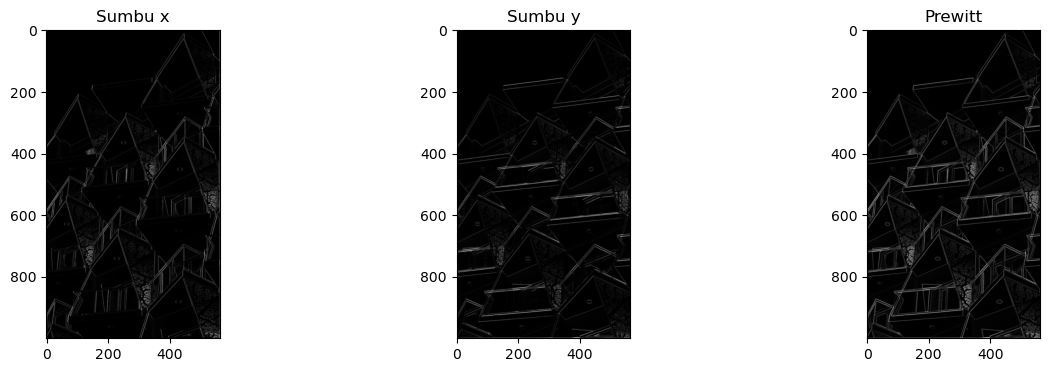

In [22]:
def prewitt(image):
    panjang, lebar = image.shape

    kernel_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
    kernel_y = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])

    result = np.zeros((panjang, lebar))
    result_x = np.zeros((panjang, lebar))
    result_y = np.zeros((panjang, lebar))

    padded_image = np.pad(image, ((1, 1), (1, 1)), mode='constant')

    for i in range(1, panjang + 1):
        for j in range(1, lebar + 1):
            sumbu_x = np.sum(np.multiply(padded_image[i - 1 : i + 2, j - 1 : j + 2], kernel_x))
            sumbu_y = np.sum(np.multiply(padded_image[i - 1 : i + 2, j - 1 : j + 2], kernel_y))

            fix_pixel = np.sqrt(sumbu_x ** 2 + sumbu_y ** 2)
            result[i - 1, j - 1] = fix_pixel
            result_x[i - 1, j - 1] = abs(sumbu_x)
            result_y[i - 1, j - 1] = abs(sumbu_y)

    return result, result_x, result_y

hasil_pre, x_pre, y_pre = prewitt(g_pict)

plt.figure(facecolor = 'white', figsize=[15, 4])
plt.subplot(131)
plt.title('Sumbu x')
plt.imshow(x_pre, 'gray')
plt.subplot(132)
plt.title('Sumbu y')
plt.imshow(y_pre, 'gray')
plt.subplot(133)
plt.title('Prewitt')
plt.imshow(hasil_pre, 'gray')

Script di atas mengimplementasikan fungsi `prewitt(image)` yang melakukan deteksi tepi menggunakan operator Prewitt. Langkah-langkahnya mirip dengan fungsi `sobel(image)` yang telah dijelaskan sebelumnya. Berikut adalah penjelasan langkah demi langkah:

1. Fungsi `prewitt(image)` mengambil gambar sebagai input dengan parameter `image`.

2. Variabel `panjang` dan `lebar` diinisialisasi dengan dimensi gambar menggunakan `image.shape`.

3. Dua kernel Prewitt ditentukan: `kernel_x` dan `kernel_y`. Kernel Prewitt digunakan untuk menghitung gradien gambar dalam arah sumbu x dan sumbu y.

4. Variabel `result`, `result_x`, dan `result_y` diinisialisasi dengan matriks nol sesuai dengan dimensi gambar.

5. Gambar `image` dipadding dengan metode 'constant' menggunakan `np.pad` untuk menghindari masalah indeks saat menghitung gradien di tepi gambar.

6. Dilakukan iterasi pada setiap piksel dalam gambar yang telah dipadding, mulai dari indeks (1, 1) hingga (panjang+1, lebar+1).

7. Untuk setiap piksel, dilakukan perkalian matriks antara bagian gambar sekitarnya dengan kernel Prewitt pada sumbu x dan sumbu y. Kemudian, hasil perkalian dijumlahkan menggunakan `np.sum` untuk mendapatkan gradien di sumbu x (`sumbu_x`) dan sumbu y (`sumbu_y`).

8. Gradien di setiap piksel dihitung menggunakan rumus Euclidean distance: `fix_pixel = np.sqrt(sumbu_x ** 2 + sumbu_y ** 2)`.

9. Nilai gradien (`fix_pixel`) disimpan di matriks `result` dan nilai absolut gradien di sumbu x (`abs(sumbu_x)`) dan sumbu y (`abs(sumbu_y)`) disimpan di matriks `result_x` dan `result_y` masing-masing.

10. Setelah iterasi selesai, matriks `result`, `result_x`, dan `result_y` dikembalikan sebagai hasil dari fungsi `prewitt(image)`.

11. Dilakukan pemanggilan fungsi `prewitt(g_pict)` dengan menggunakan gambar skala abu-abu (`g_pict`) sebagai argumen. Hasil dari fungsi tersebut disimpan dalam variabel `hasil_pre`, `x_pre`, dan `y_pre`.

12. Selanjutnya, gambar hasil deteksi tepi pada sumbu x (`x_pre`), sumbu y (`y_pre`), dan gabungan (`hasil_pre`) ditampilkan dalam tiga subplot menggunakan `plt.subplot`.

13. `plt.figure` digunakan untuk mengatur warna latar belakang dan ukuran figur yang akan ditampilkan.

14. `plt.title` digunakan untuk memberikan judul pada setiap subplot.

15. `plt.imshow` digunakan untuk menampilkan gambar pada setiap subplot dengan mode tampilan skala abu-abu ('gray').

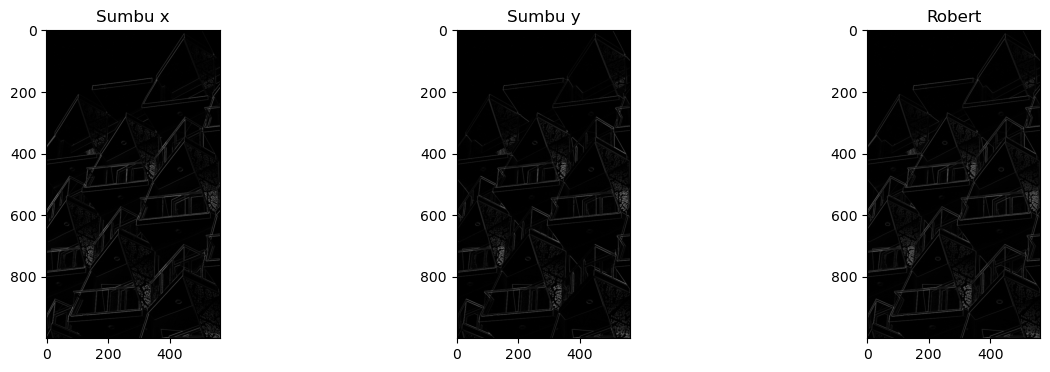

In [23]:
def robert(image):
    height, width = image.shape

    kernel_x = np.array([[1, 0], [0, -1]])
    kernel_y = np.array([[0, 1], [-1, 0]])

    result = np.zeros((height, width))
    result_x = np.zeros((height, width))
    result_y = np.zeros((height, width))

    padded_image = np.pad(image, ((1, 1), (1, 1)), mode = 'constant')

    for i in range(1, height + 1):
        for j in range(1, width + 1):
            gradient_x = np.sum(np.multiply(padded_image[i - 1 : i + 1, j - 1 : j + 1], kernel_x))
            gradient_y = np.sum(np.multiply(padded_image[i- 1 : i + 1, j - 1 : j + 1], kernel_y))

            fix_pixel = np.sqrt(gradient_x ** 2 + gradient_y ** 2)

            result[i - 1, j - 1] = fix_pixel
            result_x[i - 1, j - 1] = abs(gradient_x)
            result_y[i - 1, j - 1] = abs(gradient_y)

    return result, result_x, result_y

hasil_rob, x_rob, y_rob = robert(g_pict)

plt.figure(facecolor = 'white', figsize = [15, 4])
plt.subplot(131)
plt.title('Sumbu x')
plt.imshow(x_rob, 'gray')
plt.subplot(132)
plt.title('Sumbu y')
plt.imshow(y_rob, 'gray')
plt.subplot(133)
plt.title('Robert')
plt.imshow(hasil_rob, 'gray')

Script di atas mengimplementasikan fungsi `robert(image)` yang melakukan deteksi tepi menggunakan operator Robert. Berikut adalah penjelasan langkah demi langkah:

1. Fungsi `robert(image)` mengambil gambar sebagai input dengan parameter `image`.

2. Variabel `height` dan `width` diinisialisasi dengan dimensi gambar menggunakan `image.shape`.

3. Dua kernel Robert ditentukan: `kernel_x` dan `kernel_y`. Kernel Robert digunakan untuk menghitung gradien gambar dalam arah sumbu x dan sumbu y.

4. Variabel `result`, `result_x`, dan `result_y` diinisialisasi dengan matriks nol sesuai dengan dimensi gambar.

5. Gambar `image` dipadding dengan metode 'constant' menggunakan `np.pad` untuk menghindari masalah indeks saat menghitung gradien di tepi gambar.

6. Dilakukan iterasi pada setiap piksel dalam gambar yang telah dipadding, mulai dari indeks (1, 1) hingga (height+1, width+1).

7. Untuk setiap piksel, dilakukan perkalian matriks antara bagian gambar sekitarnya dengan kernel Robert pada sumbu x dan sumbu y. Kemudian, hasil perkalian dijumlahkan menggunakan `np.sum` untuk mendapatkan gradien di sumbu x (`gradient_x`) dan sumbu y (`gradient_y`).

8. Gradien di setiap piksel dihitung menggunakan rumus Euclidean distance: `fix_pixel = np.sqrt(gradient_x ** 2 + gradient_y ** 2)`.

9. Nilai gradien (`fix_pixel`) disimpan di matriks `result` dan nilai absolut gradien di sumbu x (`abs(gradient_x)`) dan sumbu y (`abs(gradient_y)`) disimpan di matriks `result_x` dan `result_y` masing-masing.

10. Setelah iterasi selesai, matriks `result`, `result_x`, dan `result_y` dikembalikan sebagai hasil dari fungsi `robert(image)`.

11. Dilakukan pemanggilan fungsi `robert(g_pict)` dengan menggunakan gambar skala abu-abu (`g_pict`) sebagai argumen. Hasil dari fungsi tersebut disimpan dalam variabel `hasil_rob`, `x_rob`, dan `y_rob`.

12. Selanjutnya, gambar hasil deteksi tepi pada sumbu x (`x_rob`), sumbu y (`y_rob`), dan gabungan (`hasil_rob`) ditampilkan dalam tiga subplot menggunakan `plt.subplot`.

13. `plt.figure` digunakan untuk mengatur warna latar belakang dan ukuran figur yang akan ditampilkan.

14. `plt.title` digunakan untuk memberikan judul pada setiap subplot.

15. `plt.imshow` digunakan untuk menampilkan gambar pada setiap subplot dengan mode tampilan skala abu-abu ('gray').

2. Buatlah method untuk mencari hasil terbaik dari ketiga metode no 1 dengan cara melihat jumlah warna yang diperoleh dari hasil deteksi tepi(Dapat menggunakan if-else statement)

In [24]:
def compare(image1, image2, image3):
    sum = [0, 0, 0]
    images = [image1, image2, image3]
    for index, img in enumerate(images): 
        for i in range(img.shape[0]):
            for j in range(img.shape[1]):
                if img[i, j] != 0:
                    sum[index] += 1

    if sum[0] > sum[1] and sum[0] > sum[2]:
        if sum[1] > sum[2]:
            return "Sobel > Prewitt > Robert"
        else:
            return "Sobel > Robert > Prewitt"
    elif sum[1] > sum[0] and sum[1] > sum[2]:
        if sum[0] > sum[2]:
            return "Prewitt > Sobel > Robert"
        else:
            return "Prewitt > Robert > Sobel"
    elif sum[2] > sum[0] and sum[2] > sum[1]:
        if sum[0] > sum[1]:
            return "Robert > Sobel > Prewitt"
        else:
            return "Robert > Prewitt > Sobel"
    else:
        return "Gelap"

compare(hasil_sob, hasil_pre, hasil_rob)

'Prewitt > Sobel > Robert'

Fungsi `compare(image1, image2, image3)` digunakan untuk membandingkan hasil deteksi tepi dari tiga gambar yang diberikan. Gambar-gambar tersebut diberikan sebagai argumen `image1`, `image2`, dan `image3`.

Berikut adalah penjelasan langkah demi langkah fungsi `compare`:

1. Fungsi `compare` mengambil tiga gambar sebagai argumen `image1`, `image2`, dan `image3`.

2. Variabel `sum` diinisialisasi sebagai daftar `[0, 0, 0]`. Variabel ini akan digunakan untuk menyimpan jumlah piksel yang tidak bernilai nol (gelap) pada setiap gambar.

3. Tiga gambar ditempatkan dalam daftar `images` sebagai `[image1, image2, image3]`.

4. Dilakukan iterasi pada setiap gambar dalam `images` menggunakan `enumerate(images)` untuk mendapatkan indeks gambar (`index`) dan nilai gambar (`img`).

5. Dilakukan iterasi pada setiap piksel dalam gambar menggunakan `img.shape[0]` untuk tinggi gambar dan `img.shape[1]` untuk lebar gambar.

6. Jika piksel tidak bernilai nol (`img[i, j] != 0`), maka jumlah piksel pada indeks yang sesuai dalam `sum` akan ditambah 1 (`sum[index] += 1`).

7. Setelah iterasi selesai, dilakukan perbandingan jumlah piksel pada tiga gambar untuk menentukan urutan deteksi tepi yang memiliki jumlah piksel terbanyak.

8. Jika jumlah piksel pada `image1` (`sum[0]`) lebih besar daripada jumlah piksel pada `image2` (`sum[1]`) dan `image3` (`sum[2]`), maka dilakukan perbandingan lebih lanjut.

9. Jika `sum[1]` lebih besar daripada `sum[2]`, maka hasil perbandingan adalah "Sobel > Prewitt > Robert". Jika tidak, maka hasil perbandingan adalah "Sobel > Robert > Prewitt".

10. Jika jumlah piksel pada `image2` (`sum[1]`) lebih besar daripada jumlah piksel pada `image1` (`sum[0]`) dan `image3` (`sum[2]`), maka dilakukan perbandingan lebih lanjut.

11. Jika `sum[0]` lebih besar daripada `sum[2]`, maka hasil perbandingan adalah "Prewitt > Sobel > Robert". Jika tidak, maka hasil perbandingan adalah "Prewitt > Robert > Sobel".

12. Jika jumlah piksel pada `image3` (`sum[2]`) lebih besar daripada jumlah piksel pada `image1` (`sum[0]`) dan `image2` (`sum[1]`), maka dilakukan perbandingan lebih lanjut.

13. Jika `sum[0]` lebih besar daripada `sum[1]`, maka hasil perbandingan adalah "Robert > Sobel > Prewitt". Jika tidak, maka hasil perbandingan adalah "Robert > Prewitt > Sobel".

14. Jika tidak ada perbandingan yang memenuhi kondisi di atas, artinya semua gambar memiliki jumlah piksel yang sama (semua gelap). Dalam hal ini, hasil perbandingan adalah "Gelap".

15. Dilakukan pemanggilan fungsi `compare(hasil_sob, hasil_pre, hasil_rob)` dengan menggunakan hasil deteksi tepi dari tiga gambar (hasil Sobel, hasil Prewitt, hasil Robert) sebagai argumen. Hasil dari fungsi tersebut akan dikembalikan.

Berdasarkan output yang dihasilkan dari fungsi `compare()`, didapatkan hasil `Prewitt > Sobel > Robert` yang berarti dari ketiga operator yang digunakan sebagai fungsi `edge detection`, operator Prewitt adalah operator yang paling efektif digunakan dalam kasus gambar yang telah diberikan.

Kesimpulan ini didasarkan pada perbandingan jumlah piksel yang terdeteksi sebagai tepi pada gambar yang diberikan. Hasil deteksi tepi yang dianggap "terbaik" atau paling sesuai dapat bervariasi tergantung pada sifat gambar, tujuan aplikasi, dan preferensi pengguna. Sehingga ada kemungkinan operator yang lainnya seperti Sobel dan Robert akan lebih efektif dibandingkan Operator Prewitt